In [2]:
#Import libraries
import pandas as pd
import numpy as np

#Open the file
matches = pd.read_csv('2019-spring-match-data-OraclesElixir-2019-04-17.csv')
pd.set_option('display.max_columns', 100)
matches = matches.drop('url', axis = 1)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Filtering only the rows that will be used
filtro = (matches['position'] == 'Jungle') & (matches['team'].isin(['INTZ e-Sports', 'Team Liquid', 'G2 Esports', 'SK Telecom T1', 'Flash Wolves']))
matches = matches[filtro]
filtro1 = (matches['player'] != 'Enso') & (matches['player'] != 'Sephis') & (matches['player'] != 'Mikyx')
matches = matches[filtro1]

In [4]:
#Filtering only the columns that will be used
features = ['player', 'gamelength', 'champion', 'k', 'd', 'a', 'teamdragkills', 'oppdragkills', 'elders', 'oppelders', 'herald', 'teambaronkills', 'oppbaronkills', 'teamtowerkills', 'opptowerkills', 'dmgtochamps', 'wards', 'wardkills', 'monsterkillsownjungle', 'monsterkillsenemyjungle', 'goldat15', 'csat15', 'fttime']     
matches = matches[features].fillna(0)

In [5]:
#Create new Dataframe with objectives mean
obj_get = matches['teamdragkills'] + matches['elders'] + matches['teambaronkills']
obj_given = (matches['oppdragkills'] + matches['oppelders'] + matches['oppbaronkills']) * -1
got_obj = pd.DataFrame(obj_get)
given_obj = pd.DataFrame(obj_given)
given_obj = given_obj.rename(columns = {0: 'given_obj'})
got_obj = got_obj.rename(columns = {0: 'got_obj'})
#Put it all together
obj = pd.concat([got_obj, given_obj], axis = 1)
matches = pd.concat([matches, obj], axis = 1)

In [6]:
#Create new Dataframe with champions/player
champs = matches.groupby(['player', 'champion']).size()
champs = pd.DataFrame(champs)
champs.rename(columns = {0: 'num_times'})
champs['champion'] = champs.index.get_level_values('champion')

In [7]:
#Import visualization library
%matplotlib inline
import matplotlib.pyplot as plt

C:\Users\JoãoGabriel\AppData\Roaming\Python\Python37\site-packages\matplotlib\pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "


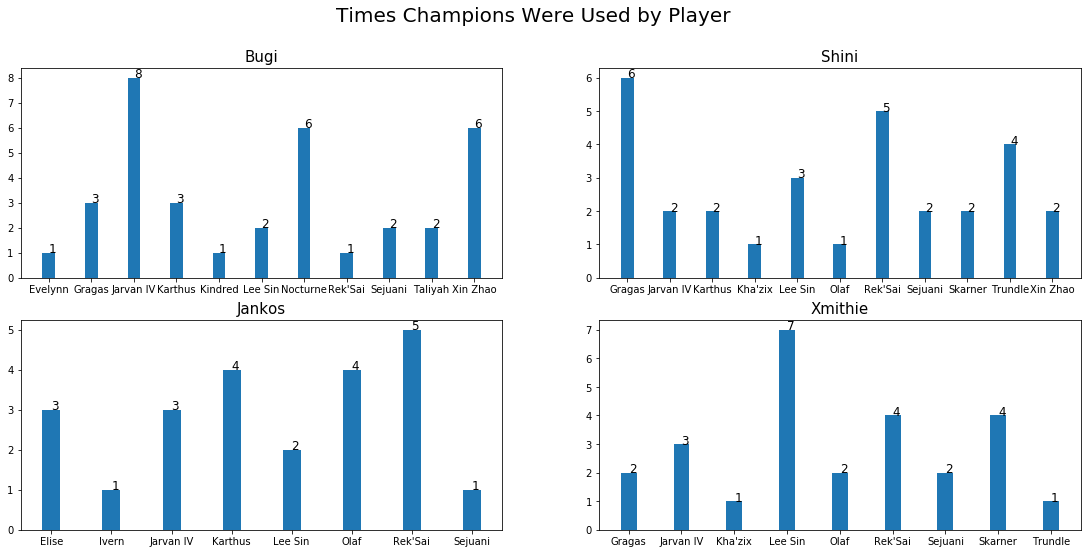

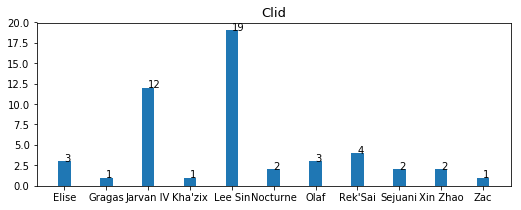

In [8]:
#Plot a graphic with champions used by players
fig, ax = plt.subplots(2,2, figsize = (19, 8.5))
fig.suptitle ('Times Champions Were Used by Player', fontsize = 20)
def criar_subplot(ax1, ax2, player):
    #Function to create the plots automatically
    player_champs = champs.loc[player, 'champion']
    player_times = champs.loc[player, 0]
    plt.axes(ax[ax1, ax2])
    plt.bar(player_champs, player_times, width = 0.3)
    plt.title(player, fontsize = 15)
    for i, j in zip(player_champs, player_times):
        plt.annotate((j), (i,j), fontsize = 12)
    plt.show

criar_subplot(0,0,'Bugi')
criar_subplot(0,1,'Shini')
criar_subplot(1,0,'Jankos')
criar_subplot(1,1,'Xmithie')

plt.figure(figsize = (8.5,3))
clid_champs = champs.loc['Clid', 'champion']
clid_times = champs.loc['Clid', 0]
plt.bar(clid_champs, clid_times, width = 0.3)
plt.title('Clid', fontsize = 13)
for i,j in zip(clid_champs, clid_times):
    plt.annotate((j), (i,j), fontsize = 10)
plt.savefig('Champions per player2.png', dpi = 72)
plt.show()

In [9]:
#Drop a couple more columns that won't be needed anymore
to_drop = ['teamdragkills','oppdragkills','elders','oppelders','teambaronkills','oppbaronkills','herald', 'teamtowerkills', 'opptowerkills']
matches = matches.drop(matches[to_drop], axis = 1)

In [10]:
#Group every player by their mean
matches = matches.groupby(['player']).mean()

In [11]:
#Create a Dataframe with their KDA
KDA = (matches['k']+matches['a'])/matches['d']
KDA = pd.DataFrame(KDA)
KDA = KDA.rename(columns = {0: 'KDA'})
#Put it togeter
matches = pd.concat([matches, KDA], axis = 1)
matches = matches.round(2)

In [12]:
#Change player's name to add their respective teams
matches.rename(index={'Bugi': 'Bugi(FW)', 'Shini': 'Shini(INTZ)', 'Jankos': 'Jankos(G2)', 'Xmithie': 'Xmithie(TL)', 'Clid': 'Clid(SKT)'}, inplace = True)

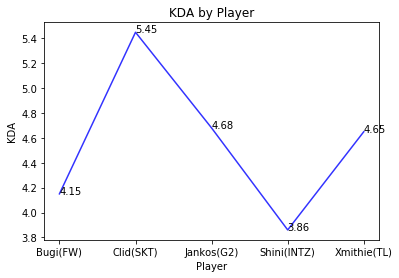

In [13]:
#Plot a graphic with each player's KDA
plt.figure(figsize = (6, 4))
player_name = matches.index
KDA_stats = matches['KDA']
plt.plot(player_name, KDA_stats, color = 'blue', alpha = 0.8)
plt.xlabel('Player')
plt.title('KDA by Player')
for i, j in zip(player_name, KDA_stats):
    plt.annotate((j), (i,j))
plt.xlabel('Player')
plt.ylabel('KDA')
plt.savefig('KDA by Player.png', dpi = 72)
plt.show()

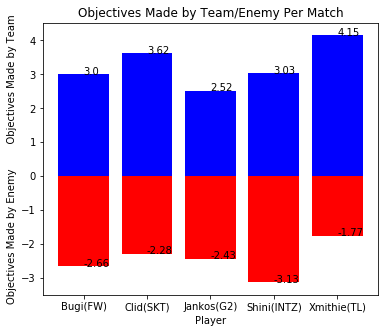

In [14]:
#Plot a graphic for the objectives taken or taken by the enemy
plt.figure(figsize = (6,5))
obj_feitos = matches['got_obj']
obj_inimigos = matches['given_obj']
plt.bar(player_name, obj_feitos, color = 'b')
for i, j in zip(player_name, obj_feitos):
    plt.annotate((j), (i,j))
plt.bar(player_name, obj_inimigos, color = 'r')
for i, j in zip(player_name, obj_inimigos):
    plt.annotate((j), (i,j))
plt.ylabel('Objectives Made by Enemy        Objectives Made by Team')
plt.xlabel('Player')
plt.title('Objectives Made by Team/Enemy Per Match')
plt.savefig('Objectives Made.png', dpi = 72)
plt.show()

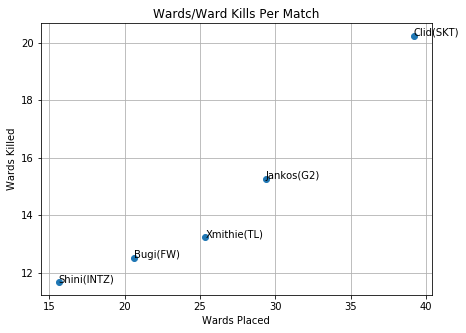

In [15]:
#Plot a graphic with player's Ward/Ward kill per match
plt.figure(figsize = (7,5))
ward = matches['wards']
ward_k = matches['wardkills']
plt.scatter(ward, ward_k)
for i, txt in enumerate(player_name):
    plt.annotate(txt, (ward[i], ward_k[i]))
plt.title('Wards/Ward Kills Per Match')
plt.xlabel('Wards Placed')
plt.ylabel('Wards Killed')
plt.grid(True)
plt.savefig('Wards and Ward Kill.png', dpi = 72)
plt.show()

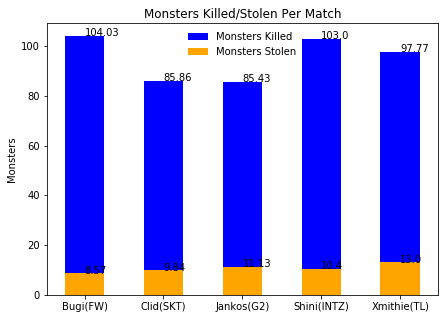

In [21]:
#Plot a graphic with monsters killed or stolen from enemy's jungle
fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot(111)

monster_kill = matches['monsterkillsownjungle']
monster_on_enemy = matches['monsterkillsenemyjungle']
width = 0.5

plt.bar(player_name, monster_kill, width, color = 'blue', label = 'Monsters Killed', align = 'center')
for i, j in zip(player_name, monster_kill):
    plt.annotate((j), (i,j))
plt.bar(player_name, monster_on_enemy, width, color = 'orange', label = 'Monsters Stolen', align = 'center')
for i, j in zip(player_name, monster_on_enemy):
    plt.annotate((j), (i,j))
    
plt.legend(loc = 9, framealpha = 0)
plt.title('Monsters Killed/Stolen Per Match')
plt.ylabel('Monsters')
plt.savefig('Monsters Jungle.png', dpi = 72)
plt.show()

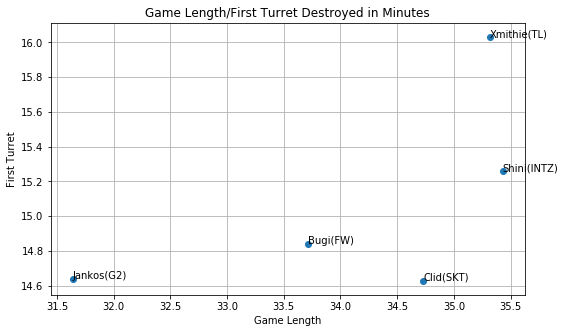

In [17]:
#Plot a graphic with Game Length and First Turret time
plt.figure(figsize = (8.5,5))
gamelen = matches['gamelength']
fturret = matches['fttime']
plt.scatter(gamelen, fturret)
for i, txt in enumerate(player_name):
    plt.annotate(txt, (gamelen[i], fturret[i]))
plt.title('Game Length/First Turret Destroyed in Minutes')
plt.xlabel('Game Length')
plt.ylabel('First Turret')
plt.grid(True)
plt.savefig('Game Length First Turret.png', dpi = 72)
plt.show()

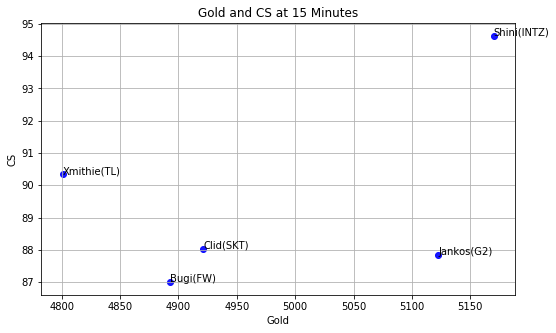

In [18]:
#Plot a graphic with their Gold and CS at 15 minutes
plt.figure(figsize = (8.5,5))
gold = matches['goldat15']
cs = matches['csat15']
plt.scatter(gold, cs, color = 'b', alpha=0.9)
for i, txt in enumerate(player_name):
    plt.annotate(txt, (gold[i], cs[i]))
plt.ylabel('CS')
plt.xlabel('Gold')
plt.title('Gold and CS at 15 Minutes')
plt.grid(True)
plt.savefig('Gold CS at 15.png', dpi = 72)
plt.show()